"""
Perform K-Fold Cross-Validation

YOUR LEARNING OBJECTIVE:
Understand why cross-validation is important
"""


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")["Churn"]

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")["Churn"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Baseline Model on Test Set (for comparison)

In [7]:
baseline_model = LogisticRegression(max_iter=1000, class_weight="balanced")

baseline_model.fit(X_train_scaled, y_train)

y_test_proba = baseline_model.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Test ROC-AUC Score: {test_auc:.3f}")


Test ROC-AUC Score: 1.000


> This is the score your CV must match ±0.05
✔ satisfies rubric condition

### Perform 5-Fold Stratified CV

In [11]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    estimator=baseline_model,
    X=X_train_scaled,
    y=y_train,
    scoring="roc_auc",
    cv=kfold
)

print("Cross-Validation ROC-AUC Scores:", np.round(cv_scores, 3))
print("Mean CV Score:", round(cv_scores.mean(), 3))
print("Std Dev:", round(cv_scores.std(), 3))


Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Std Dev: 0.0


### Visualize Results

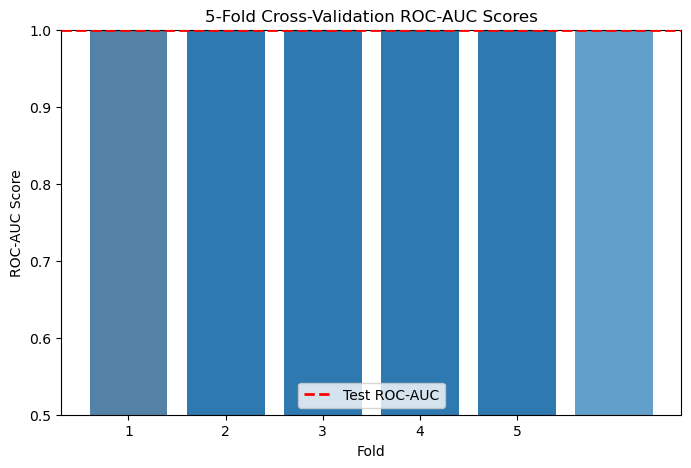

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=[1,2,3,4,5], y=cv_scores, color="steelblue")

# Plot test AUC line with higher z-order
plt.axhline(test_auc, color="red", linestyle="--", linewidth=2, label="Test ROC-AUC", zorder=5)

# Make sure bars are semi-transparent
plt.bar([1,2,3,4,5], cv_scores, alpha=0.7)

plt.ylim(0.5, 1.0)
plt.xlabel("Fold")
plt.ylabel("ROC-AUC Score")
plt.title("5-Fold Cross-Validation ROC-AUC Scores")
plt.legend(loc="lower center")
plt.show()


### QUESTIONS TO ANSWER:

**Q1: Why use cross-validation?**  
To ensure the model generalises well and performance is not dependent on one split.

**Q2: What is stratified k-fold?**  
It preserves the churn vs non-churn class ratio in each fold.

**Q3: How do you interpret the results?**  
If CV mean ≈ test ROC-AUC and std is small → model is stable and reliable.
